Hierarchical Clustering Algorithm
--

*called Hierarchical cluster analysis or HCA* 

`e.g`: All files and folders on our hard disk are organized in a hierarchy.

The algorithm groups similar objects into groups called clusters. The endpoint is a set of clusters or groups, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

This clustering technique is divided into two types:

1. Agglomerative Hierarchical Clustering

2. Divisive Hierarchical Clustering

Agglomerative Hierarchical Clustering
--
 
The Agglomerative Hierarchical Clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as `AGNES` (Agglomerative Nesting). It's a “bottom-up” approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

How does it work?
1. Make each data point a single-point cluster → forms N clusters

2. Take the two closest data points and make them one cluster → forms N-1 clusters

3. Take the two closest clusters and make them one cluster → Forms N-2 clusters.

4. Repeat step-3 until you are left with only one cluster.

<img src= 'https://miro.medium.com/max/257/0*iozEcRXXWXbDMrdG.gif' > 



There are several ways to measure the distance between clusters in order to decide the rules for clustering, and they are often called Linkage Methods. Some of the common linkage methods are:

> Complete-linkage: the distance between two clusters is defined as the longest distance between two points in each cluster.

> Single-linkage: the distance between two clusters is defined as the shortest distance between two points in each cluster. This linkage may be used to detect high values in your dataset which may be outliers as they will be merged at the end.

> Average-linkage: the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

> Centroid-linkage: finds the centroid of cluster 1 and centroid of cluster 2, and then calculates the distance between the two before merging.

`The choice of linkage method entirely depends on you and there is no hard and fast method that will always give you good results. Different linkage methods lead to different clusters.`

**`Hierarchical clustering maintains in memory`** the `linkage` process and is stored in `Dendrogram`.

What is a Dendrogram?
--

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

*A Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram we can tell how the cluster is formed.*

<img src=https://miro.medium.com/max/480/0*BfO2YN_BSxThfUoo.gif >

`Note` :- 
1. Distance between data points represents dissimilarities.

2. Height of the blocks represents the distance between clusters.

`One question that might have intrigued you by now is how do you decide when to stop merging the clusters ?`

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example `in the below figure L3` can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of vertical lines it intersects is the optimal number of clusters.

<img src='https://miro.medium.com/max/314/0*lO30pyuAmDk6h_0T.jpg' >

<hr>

**`Observation`** : Number of Clusters in this case = 3.

Divisive Hierarchical Clustering
--
 
In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

<img src='https://miro.medium.com/max/505/0*OefsgEh-nRp5Rvm_.png' >

Measuring the goodness of Clusters
--
 
Well, there are many measures to do this, perhaps the most popular one is the `Dunn's Index`. Dunn's index is the ratio between the minimum inter-cluster distances to the maximum intra-cluster diameter. The diameter of a cluster is the distance between its two furthermost points. In order to have well separated and compact clusters you should aim for a `higher Dunn's index`.

Now let's implement one use case scenario using Agglomerative Hierarchical clustering algorithm.

The data set consist of customer details of one particular shopping mall along with their spending score. (same dataset as used in K-means clustering)

In [1]:
## import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## load the dataset
dataset = pd.read_csv('datasets_module_4/Mall_Customers.csv')

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
## Out of all the features, CustomerID, Age and Gender are irrelevant fields 
## and can be dropped and create a matrix of independent variables 
## by select only Annual Income & SpendingScore.

X = dataset.iloc[ : , [3, 4]].values

## remember ,its Unsupervised , so we cannot use variable y

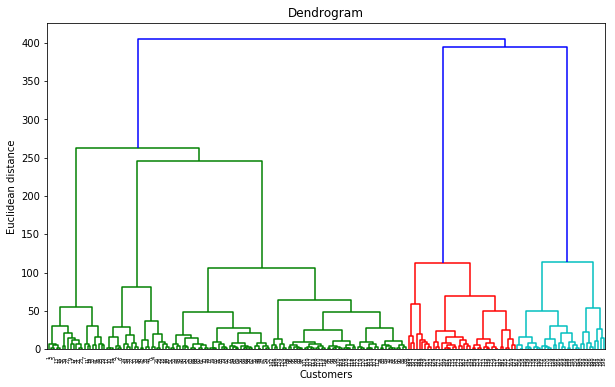

In [6]:
## Next, we need to choose the number of clusters 
## and for doing this we’ll use Dendrograms.

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,6))

dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
## https://www.statisticshowto.com/wards-method/
## for Math lovers : https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

## can try other methods like single , complete , average 
# dendrogrm = sch.dendrogram(sch.linkage(X, method = 'average'))
## Did u notice , that wards-method creates least no. of clusters 

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [7]:
## As we have already discussed to choose the number of clusters 
## we draw a horizontal line to the longest line that traverses maximum distance up and down 
## without intersecting the merging points. 
## So we draw a horizontal line and the number of vertical lines 
## it intersects is the optimal number of clusters.

## In this case, it's 5. 
##So let's fit our Agglomerative model with 5 clusters.

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                             affinity = 'euclidean', 
                             linkage = 'ward')
## https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
## If linkage is “ward”, only “euclidean” is accepted.

y_hc = hc.fit_predict(X)

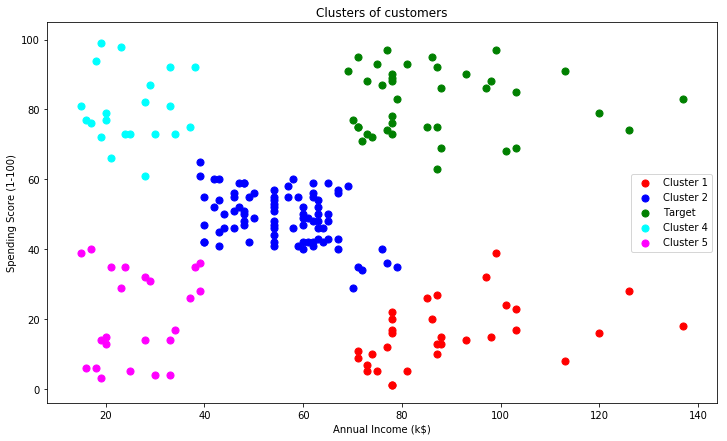

In [8]:
# Visualising the clusters
plt.figure(figsize=(12,7))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**What is the Observation ?**